## This is a FIFA 23 Clustering Project -  The goal of this project is to:

- take hundreds of player data (unlabeled) and to cluster it as best as we can regarding the following attributes: Player Overall, Player Age, Player Potential

In [20]:
# Uploading the dataset and getting insights as to what it looks like

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('Fifa 23 Players Data.csv')

df

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Club Jersey Number,Joined On,On Loan,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,...,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,67,2190,452,Paris Saint-Germain,195000,99900000,RW,2023,30,2021,-,Left,4,4,5,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,Low,Low,81,89,90,94,34,64,84,90,...,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,90,90,91,91,91,90,91,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,2023,9,2009,-,Right,4,4,4,France,https://cdn.sofifa.net/flags/fr.png,ST,19,Medium,Medium,80,88,83,87,39,78,75,92,...,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,185,81,2205,458,FC Barcelona,420000,172200000,ST,2025,9,2022,-,Right,4,4,5,Poland,https://cdn.sofifa.net/flags/pl.png,ST,9,High,Medium,75,91,79,86,44,83,71,94,...,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,91,85,88,88,88,85,88,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,70,2303,483,Manchester City,350000,198900000,CM,2025,17,2015,-,Right,5,4,4,Belgium,https://cdn.sofifa.net/flags/be.png,RF,7,High,High,74,88,93,87,64,77,94,85,...,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,86,88,87,87,87,88,91,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,73,2177,470,Paris Saint-Germain,230000,366700000,ST,2024,7,2018,-,Right,4,5,4,France,https://cdn.sofifa.net/flags/fr.png,ST,10,High,Low,97,89,80,92,36,76,78,93,...,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,92,90,90,90,90,90,92,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,https://cdn.sofifa.net/players/243/725/23_60.png,21,174,68,1287,274,Sligo Rovers,500,193000,RES,2022,20,2018,-,Right,3,2,1,-,-,-,-,Medium,Medium,68,48,43,51,31,33,40,49,...,68,59,44,63,50,45,32,31,46,37,22,50,52,40,47,39,29,27,6,9,5,13,8,49,50,50,50,50,50,51,50,44,50,41,38,41,40,36,40,15
18535,Yang Dejiang,Dejiang Yang,47,57,90000,CDM,CDM,China PR,https://cdn.sofifa.net/players/261/933/23_60.png,17,175,60,1289,267,Guangzhou FC,500,158000,SUB,2023,30,2021,-,Right,3,2,1,-,-,-,-,Medium,Medium,55,37,41,47,48,39,34,33,...,57,59,51,80,50,55,34,35,35,52,46,35,40

### In order to give an accurate representation of clusters, we want to get a random sample of players. We're choosing the number 500 because it is large enough to show where the different clusters are, but not too big where there is diluted cluster quality

In [21]:
df = df.sample(n=500, random_state=28)

df

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Club Jersey Number,Joined On,On Loan,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,...,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
499,A. Romagnoli,Alessio Romagnoli,80,80,19500000,CB,CB,Italy,https://cdn.sofifa.net/players/210/413/23_60.png,27,185,75,1737,388,Lazio,51000,33200000,CB,2027,13,2022,-,Left,3,2,2,-,https://cdn.sofifa.net/flags/it.png,-,-,Medium,Medium,66,40,55,67,83,77,36,30,...,67,55,80,53,63,81,68,79,46,82,84,31,45,34,73,84,84,78,9,14,12,8,9,59,56,58,58,58,56,61,61,67,61,73,78,73,75,80,75,20
13738,M. Bruns,Max Bruns,62,73,800000,"CDM,CB",CDM,Netherlands,https://cdn.sofifa.net/players/259/673/23_60.png,19,183,67,1606,343,FC Twente,1000,1400000,SUB,2023,38,2020,-,Right,3,2,1,-,https://cdn.sofifa.net/flags/nl.png,-,-,Medium,High,63,43,59,57,59,62,48,39,...,67,63,58,65,57,67,72,58,33,58,59,51,57,50,57,61,59,58,9,14,14,8,6,54,54,54,54,54,54,58,59,61,59,62,63,62,61,61,61,17
6338,P. Greil,Patrick Greil,68,71,1600000,"CM,CAM,CDM",CAM,Austria,https://cdn.sofifa.net/players/262/384/23_60.png,25,184,75,1786,381,SK Rapid Wien,11000,2400000,CDM,2025,24,2022,-,Right,3,3,1,-,https://cdn.sofifa.net/flags/at.png,-,-,Medium,Medium,68,61,68,68,51,65,63,60,...,68,71,68,61,63,51,84,64,65,49,59,63,70,49,66,42,54,49,14,8,10,15,7,66,67,66,66,66,67,70,70,70,70,65,64,65,63,57,63,19
18000,G. Mortensen,Gustav Mortensen,53,70,230000,LWB,LWB,Denmark,https://cdn.sofifa.net/players/270/973/23_60.png,18,175,70,1322,284,Lyngby BK,500,431000,RES,2025,25,2021,-,Left,3,2,1,-,https://cdn.sofifa.net/flags/dk.png,-,-,Medium,Medium,69,26,38,53,47,51,47,25,...,68,67,50,72,25,64,53,47,23,53,51,42,43,36,45,43,48,54,13,14,13,12,6,43,47,44,44,44,47,47,50,44,50,53,47,53,53,50,53,18
11579,L. Vigouroux,Lawrence Vigouroux,64,65,475000,GK,GK,Chile,https://cdn.sofifa.net/players/213/413/23_60.png,28,194,77,1136,362,Leyton Orient,3000,867000,GK,2023,22,2020,-,Left,2,1,1,-,https://cdn.sofifa.net/flags/cl.png,-,-,Medium,Medium,64,63,62,64,46,63,20,17,...,42,56,60,40,47,48,36,63,11,24,14,6,50,22,43,15,18,11,64,63,62,63,64,29,28,28,28,28,28,32,31,32,31,28,30,28,27,27,27,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13919,L. Everink,Luca Everink,62,73,850000,RB,CB,Netherlands,https://cdn.sofifa.net/players/264/099/23_60.png,21,179,76,1517,335,FC Twente,2000,1400000,RES,2023,24,2021,-,Right,3,2,1,-,https://cdn.sofifa.net/flags/nl.png,-,-,Medium,Medium,72,31,47,58,59,68,47,31,...,72,53,55,65,31,70,65,73,26,60,59,47,36,41,42,56,64,62,12,11,14,8,14,51,52,50,50,50,52,52,56,53,56,61,59,61,62,63,62,18
11535,J. Gibson,Jordan Gibson,64,69,875000,"RM,CM",RM,England,https://cdn.sofifa.net/players/240/813/23_60.png,24,178,80,1667,368,Carlisle United,3000,1600000,CM,2023,7,2021,-,Right,3,3,1,-,https://cdn.sofifa.net/flags/gb-eng.png,-,-,High,High,83,59,59,65,46,56,59,58,...,83,76,53,67,63,51,71,59,63,32,46,

In [22]:
# Selecting the three attributes that we want to see - Overall, Potential and Age

df = df[['Overall', 'Potential', 'Age']]

df

,Overall,Potential,Age
499,80,80,27
13738,62,73,19
6338,68,71,25
18000,53,70,18
11579,64,65,28
...,...,...,...
13919,62,73,21
11535,64,69,24
1919,74,74,30
11748,64,64,32


### This code standardizes the features of the df dataset using StandardScaler, transforming them into a new dataframe fifa_preprocessed with scaled values

In [23]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
fifa_preprocessed = pd.DataFrame(data=scaled_data,columns=df.columns)
fifa_preprocessed

,Overall,Potential,Age
0,2.015358,1.344488,0.347504
1,-0.581009,0.292698,-1.333291
2,0.284446,-0.007813,-0.072694
3,-1.879193,-0.158069,-1.543390
4,-0.292524,-0.909348,0.557604
...,...,...,...
495,-0.581009,0.292698,-0.913092
496,-0.292524,-0.308325,-0.282794
497,1.149902,0.442954,0.977803
498,-0.292524,-1.059603,1.398001


## Here we are using the Elbow Method - We can see that the ideal number of clusters in this scenario is 4. 

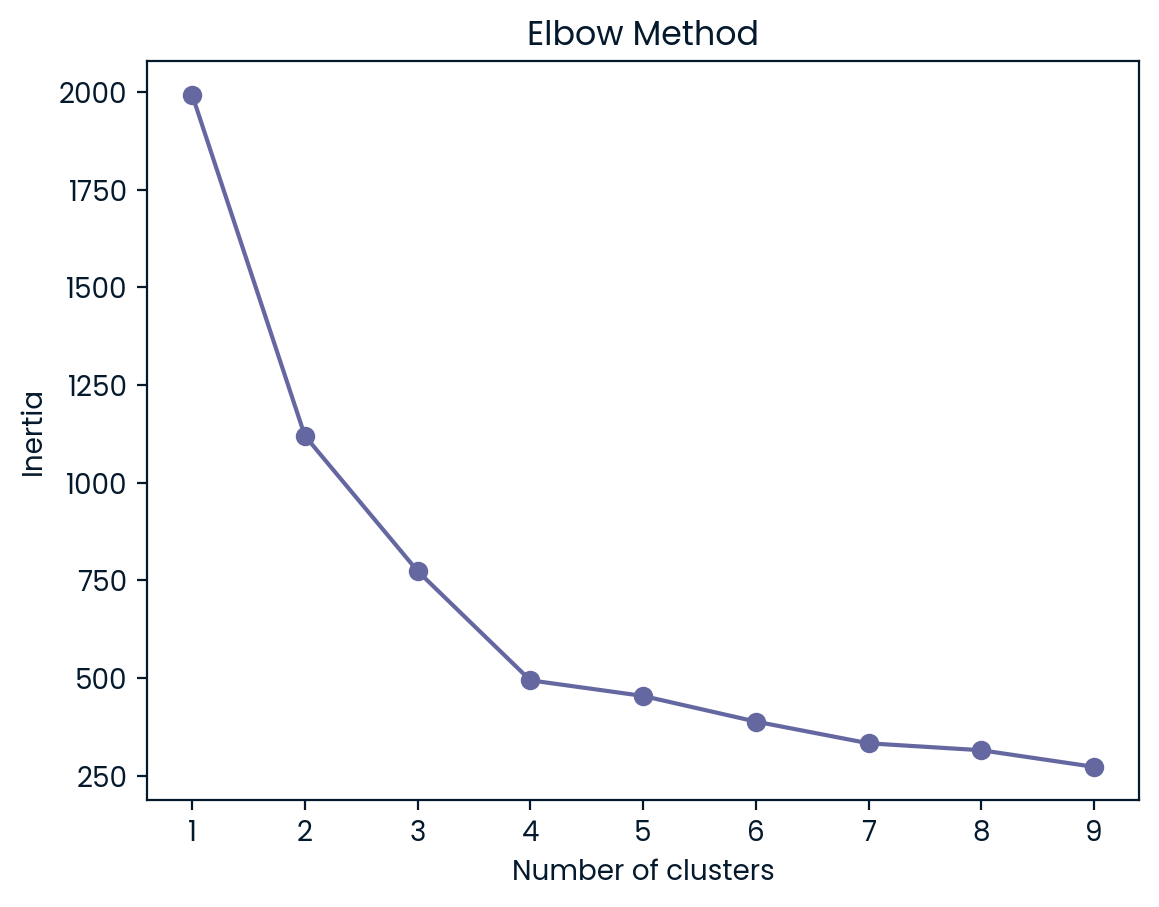

In [44]:
 ## Using the Elbow Plot to see the inertia for different values of k, helping to determine the optimal number of clusters for K-means clustering by identifying the "elbow" point in the graph

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(fifa_preprocessed)
    inertia.append(kmeans.inertia_)    
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [43]:
# We assign a cluster to every data point and create a new column showing this in our dataframe

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(fifa_preprocessed)
fifa_preprocessed['Cluster'] = kmeans.labels_


## Graph showing our 4 clusters and how they are distrubuted along age. Negative values for age are younger and positive values for age are older.

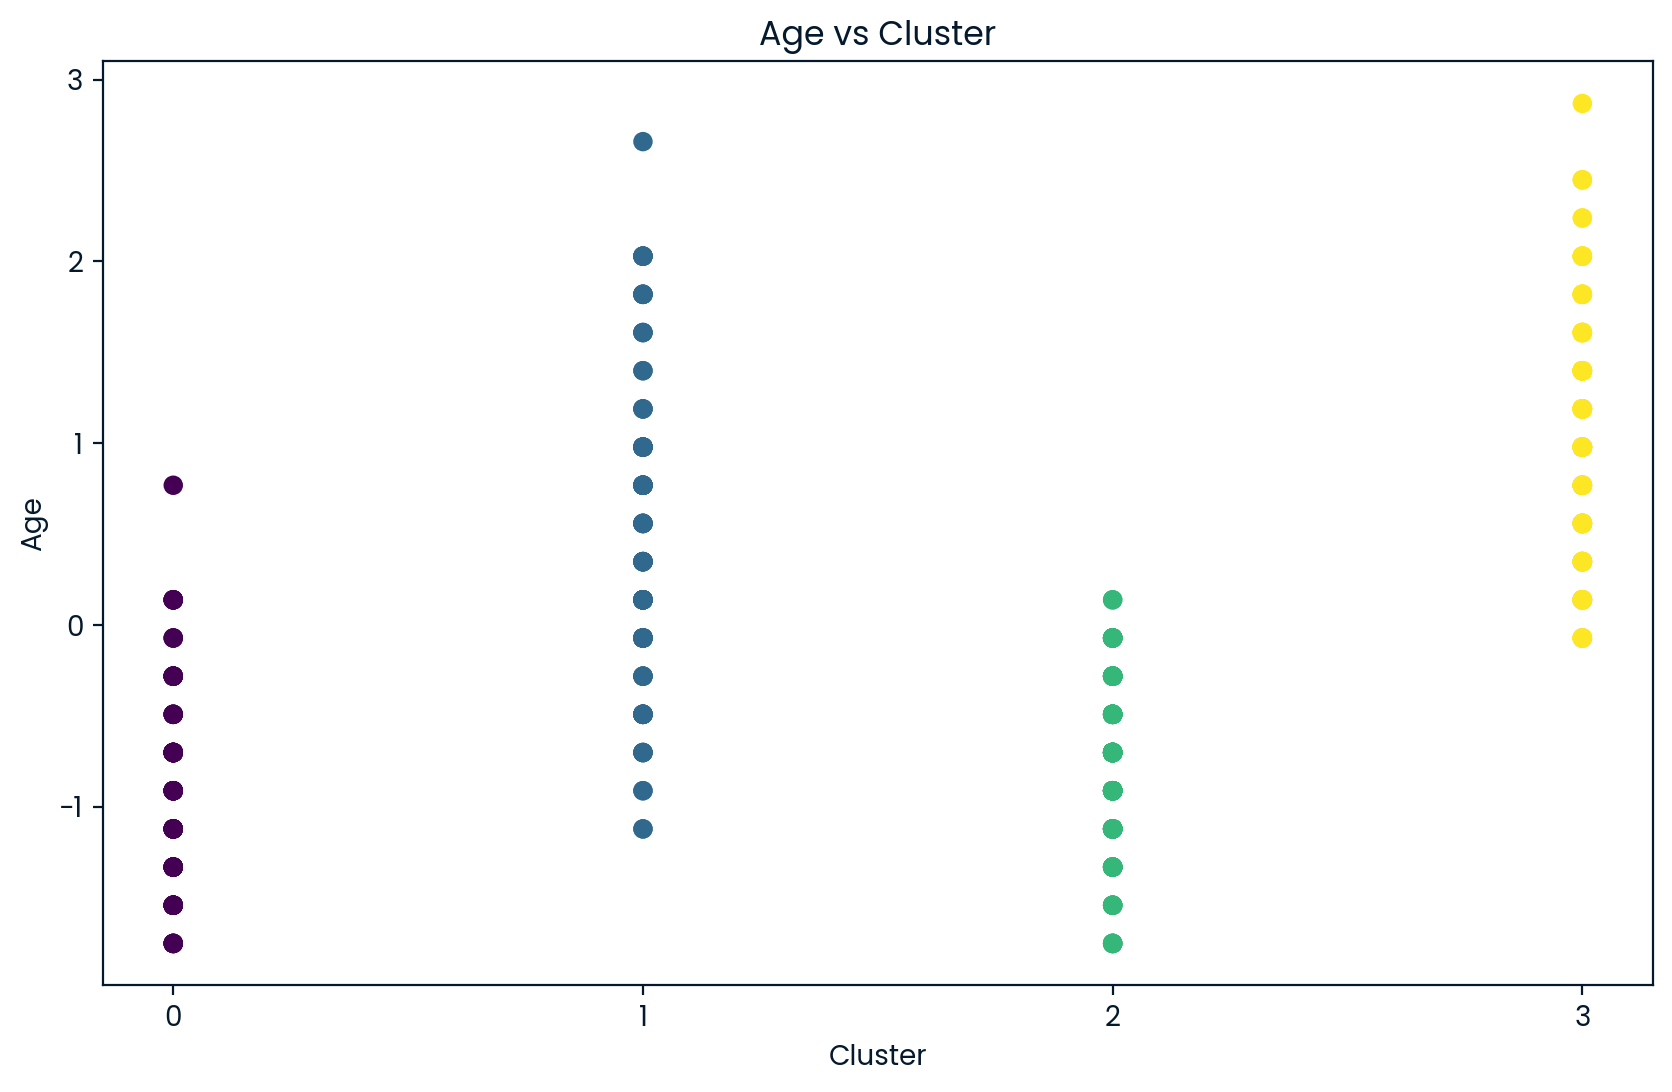

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(fifa_preprocessed['Cluster'], fifa_preprocessed['Age'], c=fifa_preprocessed['Cluster'], cmap='viridis')


plt.xlabel('Cluster')
plt.ylabel('Age')
plt.xticks(range(fifa_preprocessed['Cluster'].min(), fifa_preprocessed['Cluster'].max() + 1))  # Set x-ticks to cluster numbers
plt.title('Age vs Cluster')

plt.show()

## Graph showing our 4 clusters and how they are distrubuted along overall rating . Negative values for overall have a lower rating and positive values have a higher rating


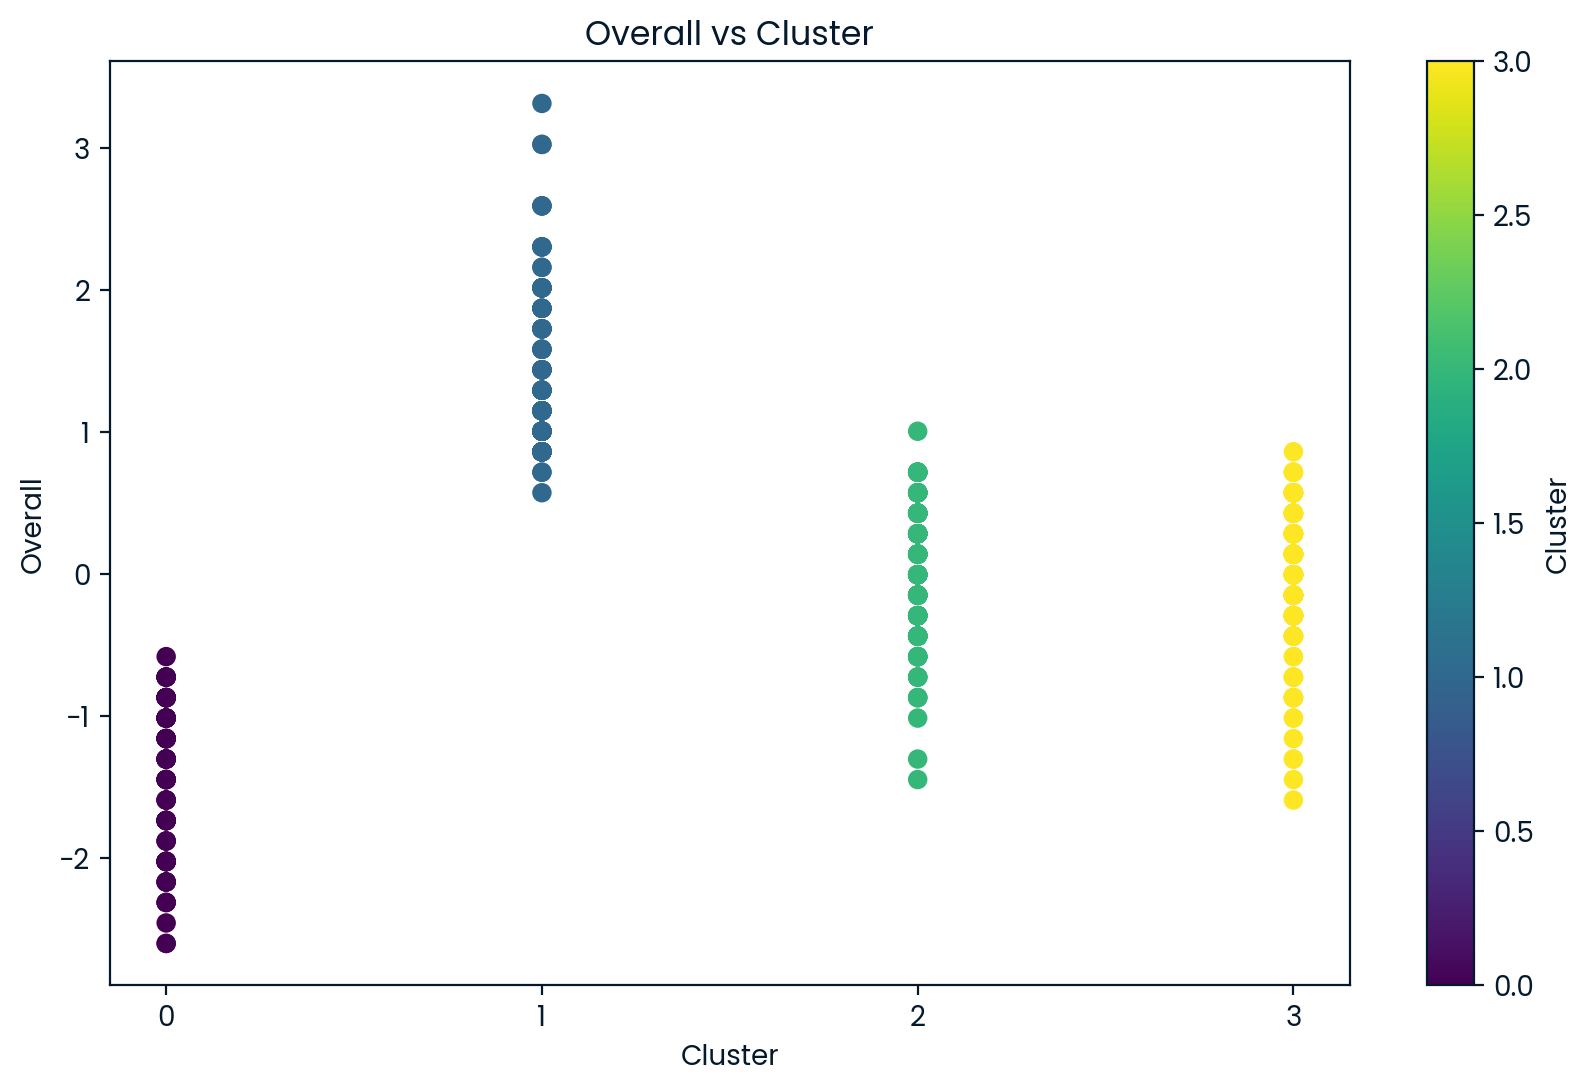

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(fifa_preprocessed['Cluster'], fifa_preprocessed['Overall'], c=fifa_preprocessed['Cluster'], cmap='viridis')

# Add labels and title
plt.xlabel('Cluster')
plt.ylabel('Overall')
plt.xticks(range(fifa_preprocessed['Cluster'].min(), fifa_preprocessed['Cluster'].max() + 1))  # Set x-ticks to cluster numbers
plt.title('Overall vs Cluster')

# Show the color bar to indicate the cluster color mapping
plt.colorbar(label='Cluster')

# Show the plot
plt.show()

## # Graph showing our 4 clusters and how they are distrubuted along potential. Negative values for potential show a lower future potential rating and positive values show a higher future potetial rating

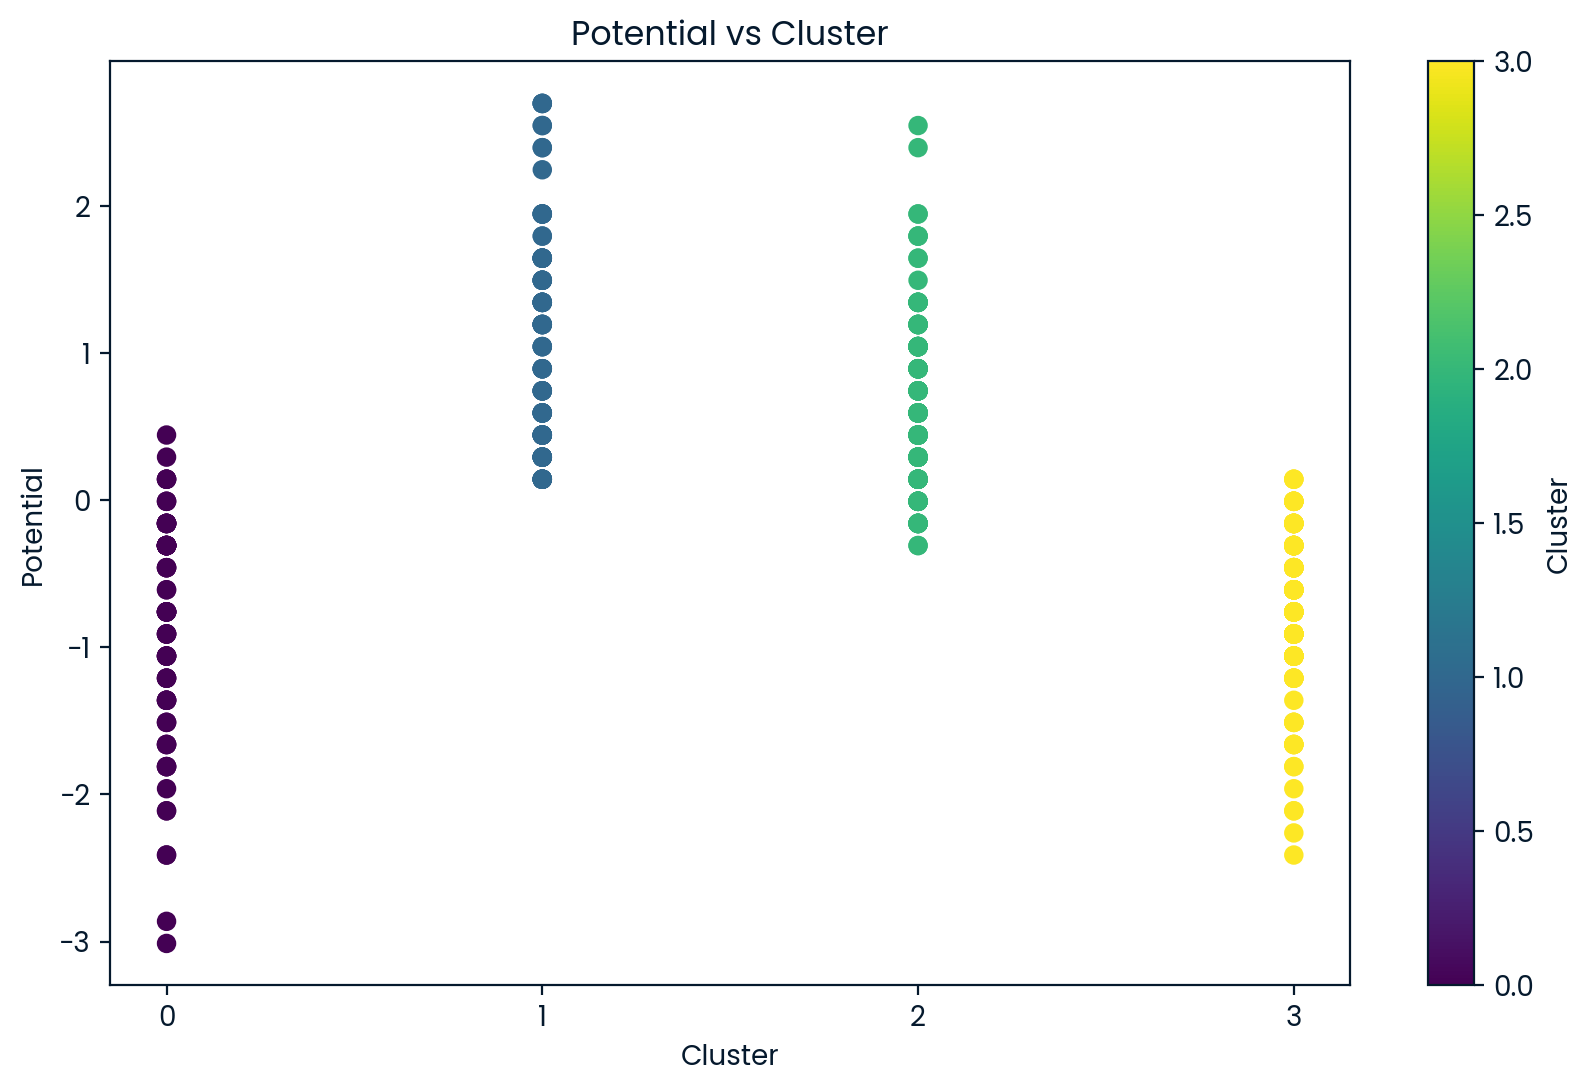

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(fifa_preprocessed['Cluster'], fifa_preprocessed['Potential'], c=fifa_preprocessed['Cluster'], cmap='viridis')

# Add labels and title
plt.xlabel('Cluster')
plt.ylabel('Potential')
plt.xticks(range(fifa_preprocessed['Cluster'].min(), fifa_preprocessed['Cluster'].max() + 1))  # Set x-ticks to cluster numbers
plt.title('Potential vs Cluster')

# Show the color bar to indicate the cluster color mapping
plt.colorbar(label='Cluster')

# Show the plot
plt.show()

## Graph showing Overall vs Age and where the clusters lie. We can see 4 well defined clusters: 
1) The dark blue represents younger players that have lower ratings / starting out in career
2) The green represents younger players that have an overall rating at around the mean/ starting out in career and good current level
3) The lighter blue represents that are the most highly rated in the game / current stars (mostly average age and slightly older guys)
4) The yellow represents older players that have an overall rating at around the mean/ guys who still havent reached stardom or are past their peak

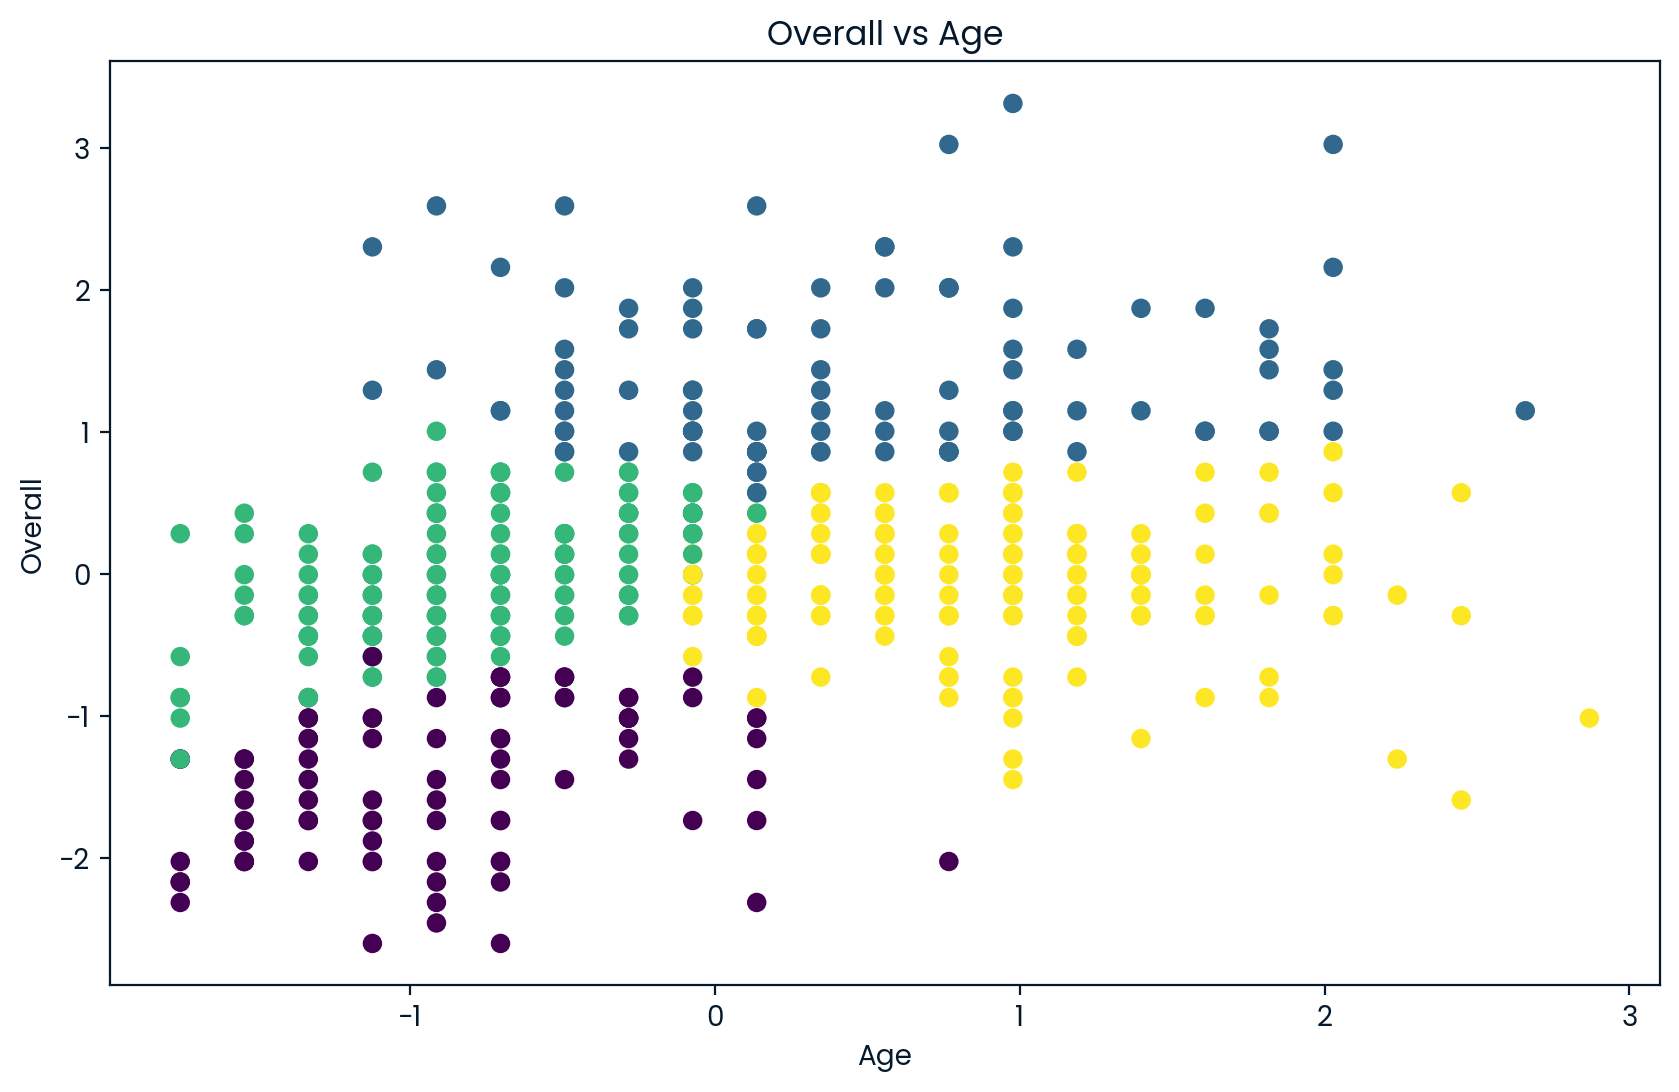

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(fifa_preprocessed['Age'], fifa_preprocessed['Overall'], c=fifa_preprocessed['Cluster'], cmap='viridis')


plt.xlabel('Age')
plt.ylabel('Overall')
plt.title('Overall vs Age')

plt.show()

## Graph showing Potential vs Age and where the clusters lie. We can see 4 well defined clusters: 
1) The dark blue represents younger players that have lower potential/ showing these guys will be average to below average players later on
2) The green represents younger players that have high potential/ these guys will be the games future stars
3) The lighter blue represents players that are the most highly rated in the game / current stars (mostly average age and slightly older guys)
4) The yellow represents older players that have an overall rating at around the mean/ guys who still havent reached stardom or are past their peak

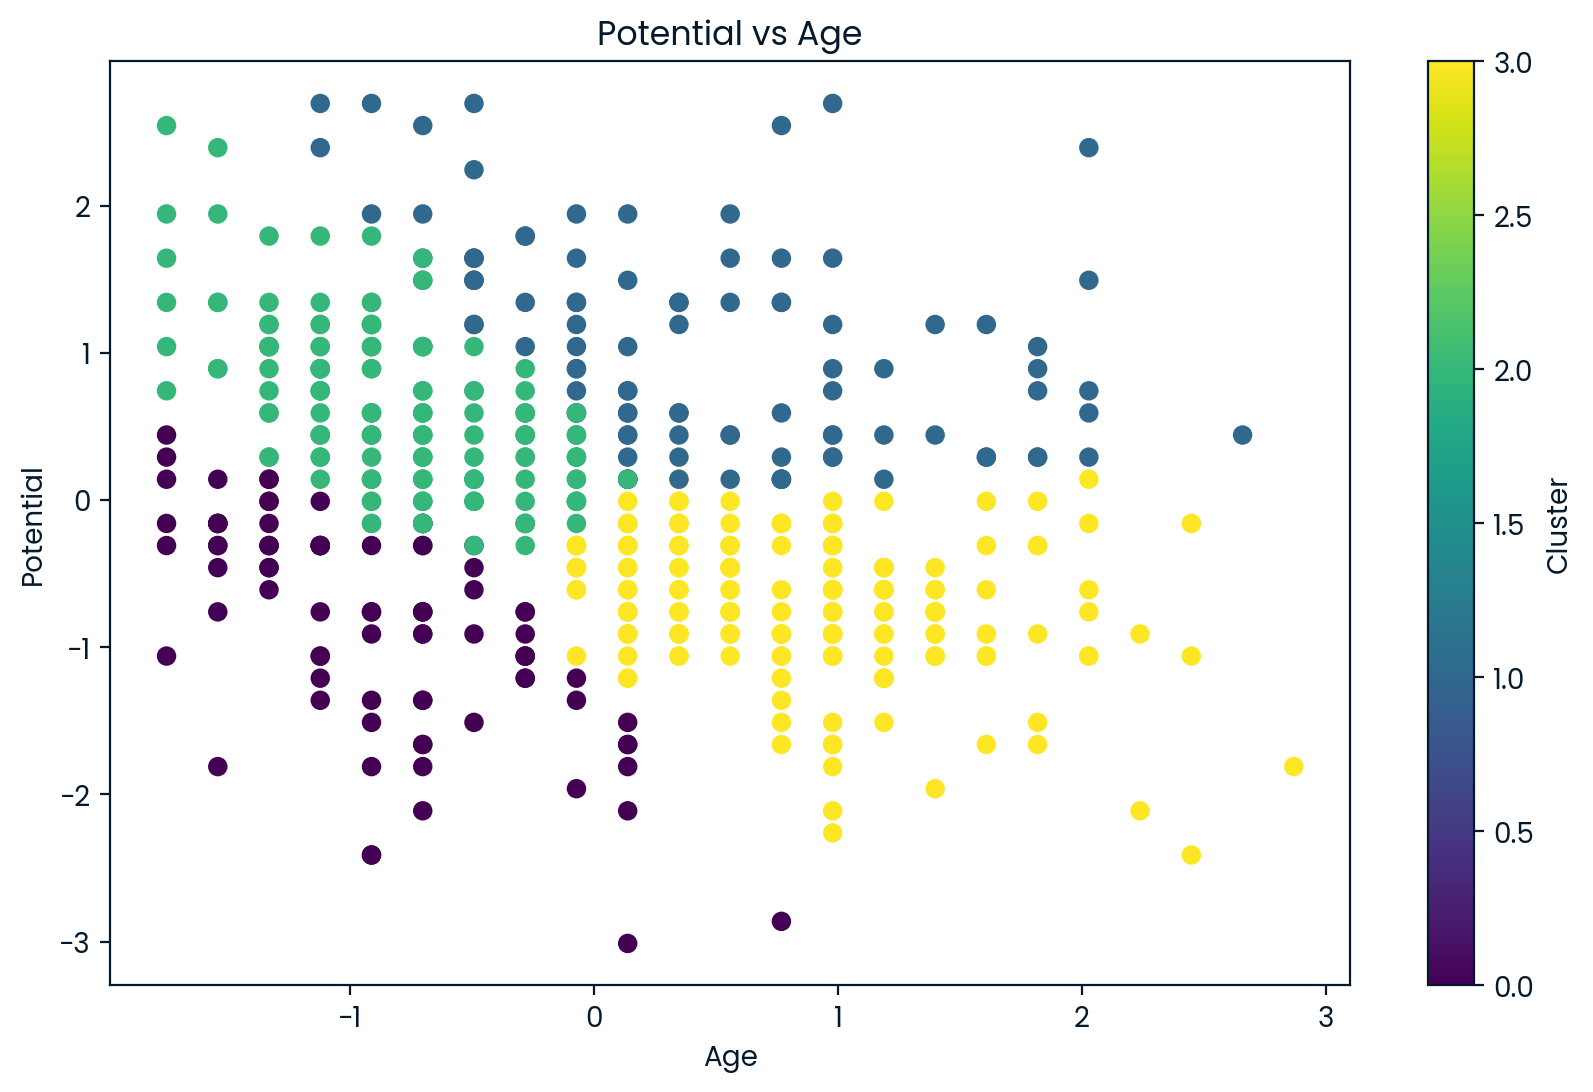

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(fifa_preprocessed['Age'], fifa_preprocessed['Potential'], c=fifa_preprocessed['Cluster'], cmap='viridis')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Potential')
plt.title('Potential vs Age')

# Show the color bar to indicate the cluster color mapping
plt.colorbar(label='Cluster')

# Show the plot
plt.show()

## Here we can see a 3-D Plot of our graph

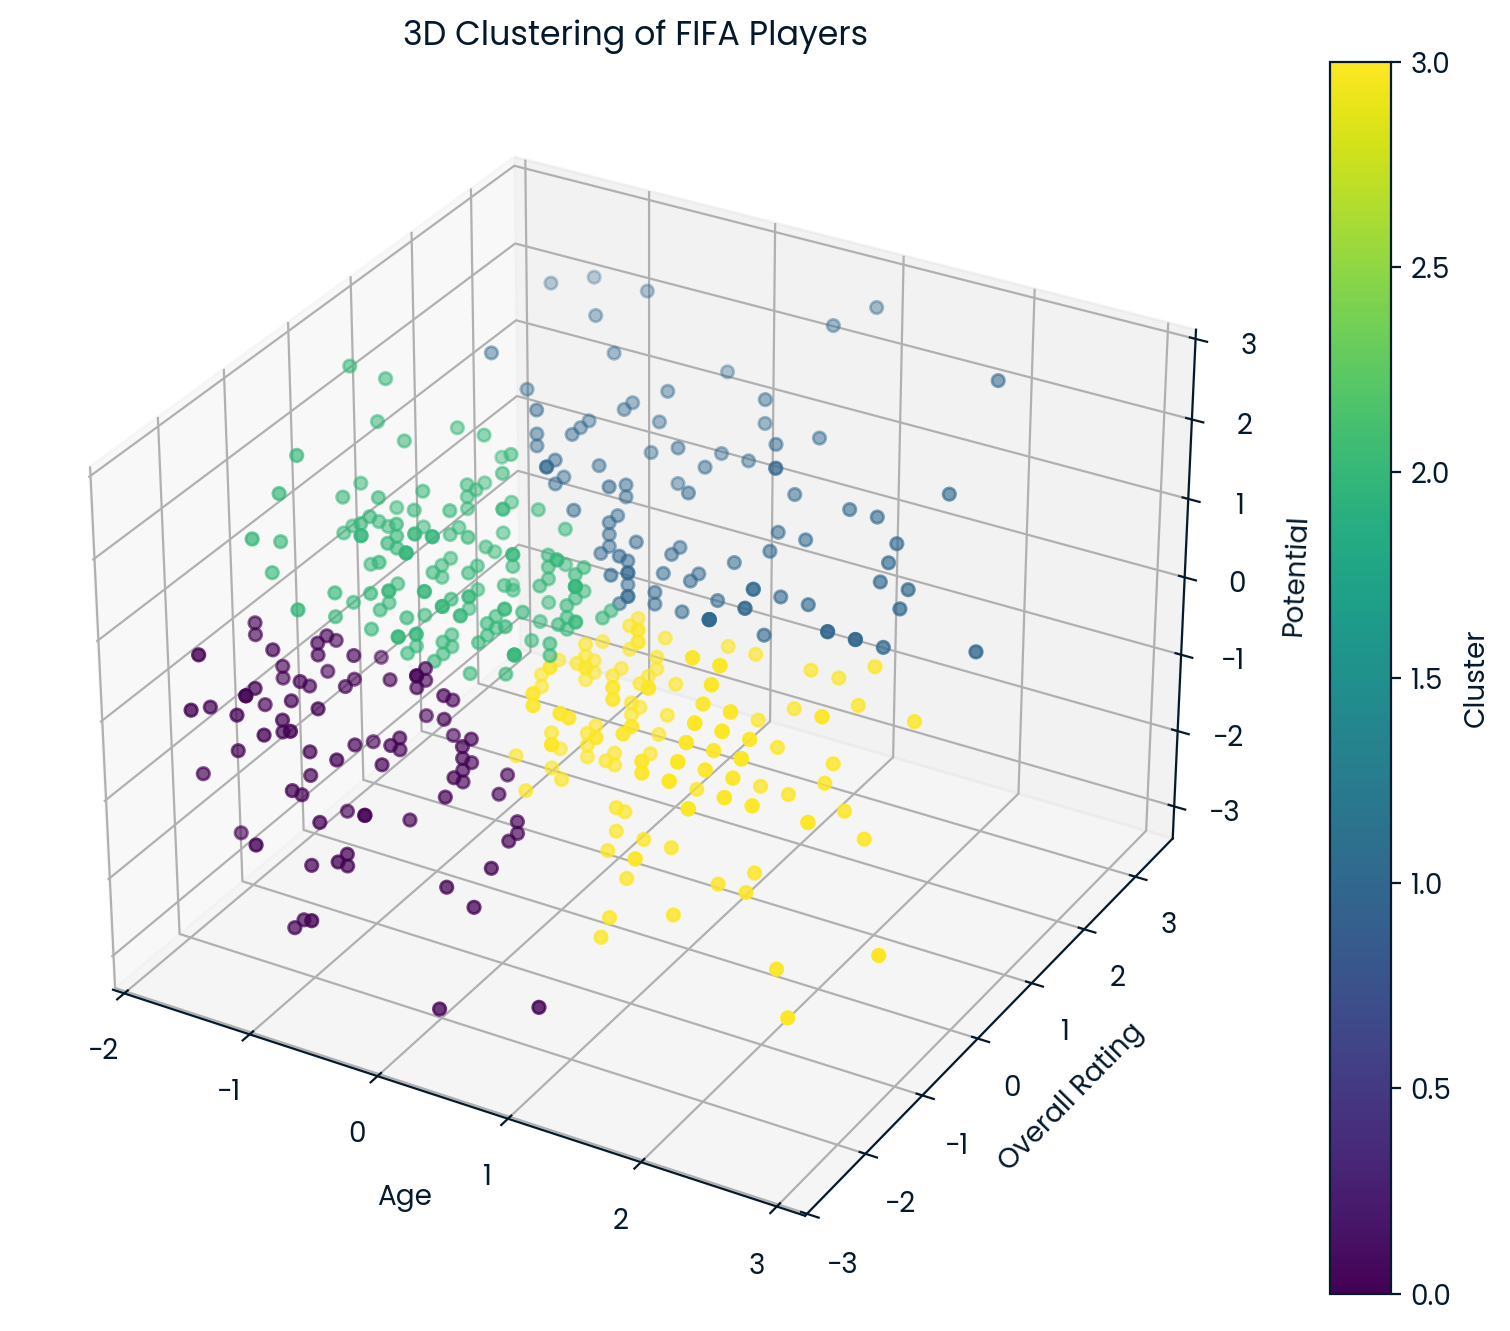

In [31]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(fifa_preprocessed['Age'], 
                     fifa_preprocessed['Overall'], 
                     fifa_preprocessed['Potential'], 
                     c=fifa_preprocessed['Cluster'], cmap='viridis', marker='o')

ax.set_xlabel('Age')
ax.set_ylabel('Overall Rating')
ax.set_zlabel('Potential')
ax.set_title('3D Clustering of FIFA Players')

fig.colorbar(scatter, ax=ax, label='Cluster')

plt.show()

## Here, we can see the 4 clusters and their averages in regards to the metrics we have been looking at

In [39]:
cluster_averages = fifa_preprocessed.groupby('Cluster')[['Overall', 'Potential', 'Age']].mean()

print(cluster_averages)

          Overall  Potential       Age
Cluster                               
0       -1.461560  -0.842956 -0.881333
1        1.410422   1.062375  0.446123
2       -0.012870   0.618763 -0.793035
3       -0.062931  -0.725307  0.879590


## The averages of the clusters are as follows:

- Cluster 1: Overall - 56, Potential - 65, Age - 21 / These are the young players with lower potential
- Cluster 2: Overall - 76, Potential - 78, Age - 27 / These are the players in the prime / stars
- Cluster 3: Overall - 66, Potential - 75, Age - 22 / These are the young players with high potential/ future stars
- Cluster 4: Overall - 66, Potemtial - 66, Age - 30 / These are the veterans, likely on decline

In [41]:
original_cluster_averages = scaler.inverse_transform(cluster_averages)

original_cluster_averages

array([[55.89534884, 65.44186047, 21.15116279],
       [75.80612245, 78.12244898, 27.46938776],
       [65.93877551, 75.17006803, 21.57142857],
       [65.59171598, 66.22485207, 29.53254438]])